<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

# Analyzing a real world data set with SQL and Python

## Objectives

This lab covers the following:

1.   Creating a database
2.   Storing a CSV data set into a SQL database
3.   Solving example questions


## Selected Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01), but to summarize, the dataset has the following variables:

*   **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

*   **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago

*   **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

*   **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

*   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

*   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

*   **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

*   **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

*   **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

In this Lab, we'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.


### Task 1: Creating a database

In [1]:
# Import jupysql Jupyter extension to create SQL cells
%load_ext sql

In [2]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()
##!pip install -q pandas==1.1.5

In [3]:
%sql sqlite:///socioeconomic.db

Connecting to 'sqlite:///socioeconomic.db'

### 2. Storing a CSV data set into a SQL database

In [4]:
# Import Pandas
import pandas

# Read the CSV from the given URL into Panda DataFrames
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')

# Use the df.to_sql() function to convert the CSV file to SQL
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")


78

In [5]:
# Verify that the CSV file has been saved into a SQL database by running a standard query to show the first 5 rows in the data set
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

Running query in 'sqlite:///socioeconomic.db'

ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


### 3. Solving example questions

#### Question 1. How many rows are in the data set?


In [6]:
# Count rows in the data set
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

Running query in 'sqlite:///socioeconomic.db'

COUNT(*)
78


#### Question 2. How many community areas in Chicago have a hardship index greater than 50.0?


In [7]:
# Count the community areas that have a hardshop index greater than 50.0
%sql SELECT COUNT(hardship_index) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

Running query in 'sqlite:///socioeconomic.db'

COUNT(hardship_index)
38


#### Question 3. What is the maximum value of hardship index in this data set?


In [8]:
# Find the maximum value of hardship index in the data set
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

Running query in 'sqlite:///socioeconomic.db'

MAX(hardship_index)
98.0


#### Question 4. Which community area which has the highest hardship index?


In [11]:
# Find the community area that has the highest hardship index
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = 98.0;

Running query in 'sqlite:///socioeconomic.db'

community_area_name
Riverdale


#### Question 5. Which Chicago community areas have per-capita incomes greater than $60,000?


In [12]:
# Find the community areas that have per-capita incomes greater than $60,000
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

Running query in 'sqlite:///socioeconomic.db'

community_area_name
Lake View
Lincoln Park
Near North Side
Loop


#### Question 6. Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.


Running query in 'sqlite:///socioeconomic.db'

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


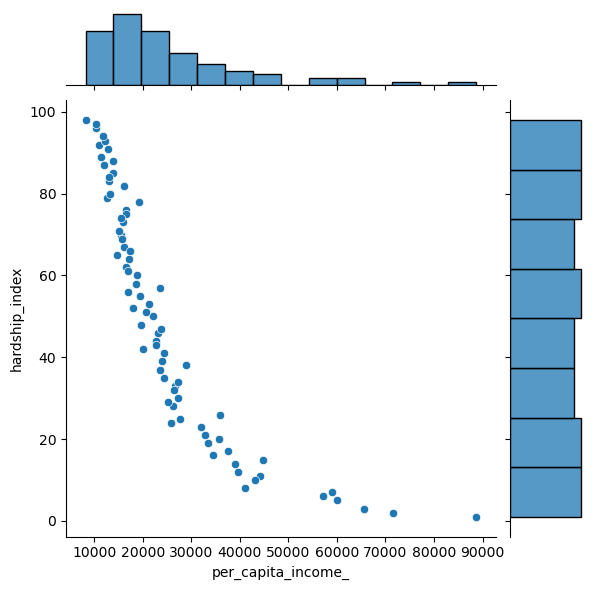

In [13]:
# Import matplotlib
import matplotlib.pyplot as plt

# Function to display the plot directly in the notebook
%matplotlib inline

# Import seaborn
import seaborn as sns

# Create a new variable using the per_capita_income_ and hardship_index variables
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;

# Create a scatter plot using seaborn with per_capital_income_ as the x axis and hardship_index as the y axis using the new the variable
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

# The plot shows that higher the hardship_index, the lower the per_capita_income

#### (Bonus) Question 7. Further explore this data set to see how the variable `per_capita_income_` is related to `percent_households_below_poverty` and `percent_aged_16_unemployed`. Try to create interesting visualizations!


Running query in 'sqlite:///socioeconomic.db'

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


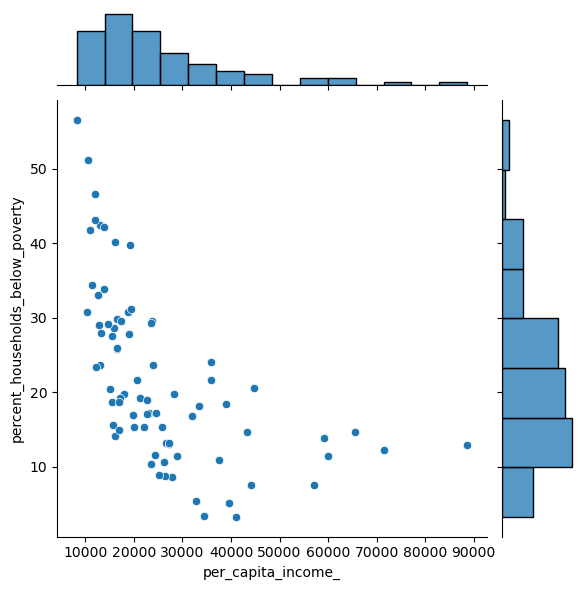

In [14]:
# Function to display the plot directly in the notebook
%matplotlib inline

# Create a new variable using the per_capita_income_ and hardship_index variables
income_vs_households_below_poverty = %sql SELECT per_capita_income_, percent_households_below_poverty FROM chicago_socioeconomic_data;

# Create a scatter plot with per_capital_income_ as the x axis and hardship_index as the y axis using the new the variable
plot = sns.jointplot(x='per_capita_income_',y='percent_households_below_poverty', data=income_vs_households_below_poverty.DataFrame())

# The plot shows that higher the households below poverty, the lower the per_capita_income

Running query in 'sqlite:///socioeconomic.db'

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


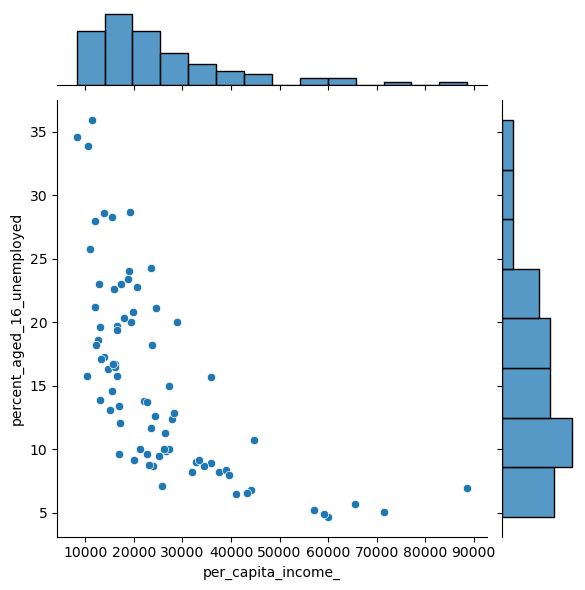

In [17]:
# Function to display the plot directly in the notebook
%matplotlib inline

# Create a new variable using the per_capita_income_ and hardship_index variables
income_vs_percent_aged_16_unemployed = %sql SELECT per_capita_income_, percent_aged_16_unemployed FROM chicago_socioeconomic_data;

# Create a scatter plot with per_capital_income_ as the x axis and hardship_index as the y axis using the new the variable
plot = sns.jointplot(x='per_capita_income_',y='percent_aged_16_unemployed', data=income_vs_percent_aged_16_unemployed.DataFrame())

# The plot shows that higher the aged 16 unemployed, the lower the per_capita_income